# Redes Neuronales Recurrentes

Estudio de Redes Neuronales Recurrentes y su aplicación en la predición de la bolsa de las acciones de Google

**Autor: Nicolás Cubero**

**Fecha: 20 de Abril de 2020**

## Importación de librerías

En primer lugar, cargamos todas las librerías necesarias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

np.random.seed(7)

Using TensorFlow backend.


## Carga y preprocesamiento de datos

Cargamos los datos, tanto los de *train* como los de *test* desde los ficheros *csv* correspondientes.

De estos *datasets* nos interesa la columna *Open*, extraemos los valores de dicha columna y les aplicamos **normalización**.

In [3]:
# Cargar datos de train
training_set = pd.read_csv('Google_Stock_Price_Train.csv', sep=',')
training_set = training_set['Open'].values

# Cargar datos de test
test_set = pd.read_csv('Google_Stock_Price_Test.csv', sep=',')
test_set = test_set['Open'].values

# Normalizamos los valores de esta columna
sc = MinMaxScaler()

training_set = sc.fit_transform(training_set.reshape(training_set.size, -1)).squeeze()
test_set = sc.transform(test_set.reshape(test_set.size, -1)).squeeze()

Deseamos generar un modelo capaz de predecir el siguiente valor de la secuencia de datos de *Open* a partir del valor actual. Preparamos los datos tomando cada valor siguiente a cada valor actual como la etiqueta a predecir a partir de cada valor actual:

In [4]:
# Usaremos el conjunto de datos para predecir el valor del siguiente instante (la etiqueta a predecir)
X_train = training_set[:-1]
y_train = training_set[1:]

X_test = test_set[:-1]
y_test = test_set[1:]

# Reajustar las dimensiones de los conjuntos de datos
X_train = X_train.reshape(X_train.size, 1, 1)
X_test = X_test.reshape(X_test.size, 1, 1)

## Entrenamiento de modelo LSMT

Elaboramos un primer modelo de red *LSMT* para regresión con 4 unidades y *MSE* como función de error:

In [4]:
def create_model1():
    
    regressor = Sequential()
    
    # Capa de entrada y capa LSTM con 4 unidades
    regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None,1)))
    
    # Capa de salida con función de activación sigmoide
    regressor.add(Dense(units=1))
    
    return regressor

In [5]:
model1 = create_model1()
model1.compile(optimizer='adam', loss='mean_squared_error')

Entrenamos el modelo:

In [6]:
model1.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 1s 644us/step - loss: 0.3241
Epoch 2/200
1257/1257 [==============================] - 0s 294us/step - loss: 0.2376
Epoch 3/200
1257/1257 [==============================] - 0s 287us/step - loss: 0.1750
Epoch 4/200
1257/1257 [==============================] - 0s 287us/step - loss: 0.1336
Epoch 5/200
1257/1257 [==============================] - 0s 285us/step - loss: 0.1080
Epoch 6/200
1257/1257 [==============================] - 0s 315us/step - loss: 0.0932
Epoch 7/200
1257/1257 [==============================] - 0s 268us/step - loss: 0.0851
Epoch 8/200
1257/1257 [==============================] - 0s 261us/step - loss: 0.0808
Epoch 9/200
1257/1257 [==============================] - 0s 251us/step - loss: 0.0784
Epoch 10/200
1257/1257 [==============================] - 0s 259us/step - loss: 0.0767
Epoch 11/200
1257/1257 [==============================] - 0s 243us/step - loss: 0.0754
Epoch 12/200
1257/1257 [============================

1257/1257 [==============================] - 0s 229us/step - loss: 2.6572e-04
Epoch 184/200
1257/1257 [==============================] - 0s 228us/step - loss: 2.6469e-04
Epoch 185/200
1257/1257 [==============================] - 0s 226us/step - loss: 2.6673e-04
Epoch 186/200
1257/1257 [==============================] - 0s 223us/step - loss: 2.6598e-04
Epoch 187/200
1257/1257 [==============================] - 0s 214us/step - loss: 2.6922e-04
Epoch 188/200
1257/1257 [==============================] - 0s 234us/step - loss: 2.6976e-04
Epoch 189/200
1257/1257 [==============================] - 0s 222us/step - loss: 2.6769e-04
Epoch 190/200
1257/1257 [==============================] - 0s 223us/step - loss: 2.6577e-04
Epoch 191/200
1257/1257 [==============================] - 0s 230us/step - loss: 2.6702e-04
Epoch 192/200
1257/1257 [==============================] - 0s 217us/step - loss: 2.6622e-04
Epoch 193/200
1257/1257 [==============================] - 0s 224us/step - loss: 2.6608e-04
Ep

## Evaluación del modelo y comparación con los datos reales

Predecimos el conjunto de test con nuestro modelo y comparamos estas prediciones con los valores reales.

19/19 [==============================] - 0s 3ms/step


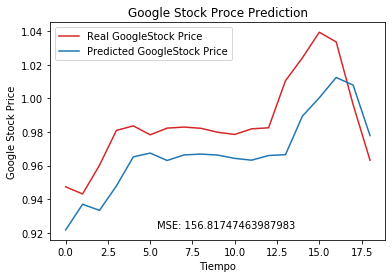

In [7]:
# Evaluar este modelo
loss1 = model1.evaluate(X_test, y_test)

# Realizar predicciones sobre el conjunto de test
y_pred = model1.predict(X_test)

# Deshacemos la normalización
y_pred_desn = sc.inverse_transform(y_pred.reshape(y_pred.size, -1)).squeeze()
y_test_desn = sc.inverse_transform(y_test.reshape(y_test.size, -1)).squeeze()

# Visualizar resultados
plt.plot(y_test, color='tab:red', label='Real GoogleStock Price')
plt.plot(y_pred, color='tab:blue', label='Predicted GoogleStock Price')
plt.title('Google Stock Proce Prediction')
plt.xlabel('Tiempo')
plt.ylabel('Google Stock Price')
plt.text(x=y_pred.size/2, y=y_pred.min()*1.001, s='MSE: {}'.format(((y_test_desn-y_pred_desn)**2).mean()),
         horizontalalignment='center')
plt.legend()
plt.show()

In [8]:
print('Error cometido por el modelo (datos normalizados): ', loss1)

Error cometido por el modelo (datos normalizados):  0.0005426745628938079


Observamos que la predición realizada por el modelo se ajusta con mucha similitud a los datos reales. No obstante y por lo general, los valores predichos por el modelo son de una ligera menor magnitud que los datos reales.

## Mejora del modelo

A continuación, se probarán otros modelos *LSMT* y se compararán sus rendimientos entre sí y con el anterior modelo, con la finalidad de encontrar el mejor modelo para este problema.

Primeramente, se elaborará un modelo similar al anterior considerando 8 unidades para la capa *LSTM*:

In [9]:
def create_model_1layer_8units():
    
    regressor = Sequential()
    
    # Capa de entrada y capa LSTM con 8 unidades
    regressor.add(LSTM(units=8, activation='sigmoid', input_shape=(None,1)))
    
    # Capa de salida con función de activación sigmoide
    regressor.add(Dense(units=1))
    
    return regressor

In [10]:
model2 = create_model_1layer_8units()
model2.compile(optimizer='adam', loss='mean_squared_error')

Entrenamos el modelo y lo evaluamos con el conjunto de test:

In [11]:
# Entrenamiento del modelo
model2.fit(X_train, y_train, batch_size=32, epochs=200)

# Predicción y evaluación con el conjunto de test
loss2 = model2.evaluate(X_test, y_test)

print('Error cometido por model_1layer_8units: ', loss2)

Epoch 1/200
1257/1257 [==============================] - 0s 270us/step - loss: 0.4357
Epoch 2/200
1257/1257 [==============================] - 0s 289us/step - loss: 0.2836
Epoch 3/200
1257/1257 [==============================] - 0s 279us/step - loss: 0.1847
Epoch 4/200
1257/1257 [==============================] - 0s 282us/step - loss: 0.1254
Epoch 5/200
1257/1257 [==============================] - 0s 265us/step - loss: 0.0932
Epoch 6/200
1257/1257 [==============================] - 0s 275us/step - loss: 0.0775
Epoch 7/200
1257/1257 [==============================] - 0s 258us/step - loss: 0.0705
Epoch 8/200
1257/1257 [==============================] - 0s 281us/step - loss: 0.0673
Epoch 9/200
1257/1257 [==============================] - 0s 246us/step - loss: 0.0655
Epoch 10/200
1257/1257 [==============================] - 0s 254us/step - loss: 0.0642
Epoch 11/200
1257/1257 [==============================] - 0s 245us/step - loss: 0.0628
Epoch 12/200
1257/1257 [============================

1257/1257 [==============================] - 0s 217us/step - loss: 2.5400e-04
Epoch 183/200
1257/1257 [==============================] - 0s 213us/step - loss: 2.5639e-04
Epoch 184/200
1257/1257 [==============================] - 0s 226us/step - loss: 2.5631e-04
Epoch 185/200
1257/1257 [==============================] - 0s 215us/step - loss: 2.5395e-04
Epoch 186/200
1257/1257 [==============================] - 0s 212us/step - loss: 2.5306e-04
Epoch 187/200
1257/1257 [==============================] - 0s 227us/step - loss: 2.6733e-04
Epoch 188/200
1257/1257 [==============================] - 0s 212us/step - loss: 2.6450e-04
Epoch 189/200
1257/1257 [==============================] - 0s 216us/step - loss: 2.6271e-04
Epoch 190/200
1257/1257 [==============================] - 0s 215us/step - loss: 2.5578e-04
Epoch 191/200
1257/1257 [==============================] - 0s 218us/step - loss: 2.5783e-04
Epoch 192/200
1257/1257 [==============================] - 0s 223us/step - loss: 2.5410e-04
Ep

Observamos que el error sobre el conjunto de *test* disminuye respecto del anterior modelo.

Elaboramos otro modelo similar considerando 24 unidades para la capa LSTM:

In [12]:
def create_model_1layer_24units():
    
    regressor = Sequential()
    
    # Capa de entrada y capa LSTM con 24 unidades
    regressor.add(LSTM(units=24, activation='sigmoid', input_shape=(None,1)))
    
    # Capa de salida con función de activación sigmoide
    regressor.add(Dense(units=1))
    
    return regressor

In [13]:
model3 = create_model_1layer_24units()
model3.compile(optimizer='adam', loss='mean_squared_error')

Entrenamos el modelo y lo evaluamos con el conjunto de test:

In [14]:
# Entrenamiento del modelo
model3.fit(X_train, y_train, batch_size=32, epochs=200)

# Predicción y evaluación con el conjunto de test
loss3 = model3.evaluate(X_test, y_test)

print()
print('Error cometido por model_1layer_24units: ', loss3)

Epoch 1/200
1257/1257 [==============================] - 0s 275us/step - loss: 1.2538
Epoch 2/200
1257/1257 [==============================] - 0s 285us/step - loss: 0.6478
Epoch 3/200
1257/1257 [==============================] - 0s 282us/step - loss: 0.3137
Epoch 4/200
1257/1257 [==============================] - 0s 272us/step - loss: 0.1541
Epoch 5/200
1257/1257 [==============================] - 0s 248us/step - loss: 0.0883
Epoch 6/200
1257/1257 [==============================] - 0s 218us/step - loss: 0.0658
Epoch 7/200
1257/1257 [==============================] - 0s 211us/step - loss: 0.0590
Epoch 8/200
1257/1257 [==============================] - 0s 237us/step - loss: 0.0565
Epoch 9/200
1257/1257 [==============================] - 0s 253us/step - loss: 0.0549
Epoch 10/200
1257/1257 [==============================] - 0s 256us/step - loss: 0.0535
Epoch 11/200
1257/1257 [==============================] - 0s 237us/step - loss: 0.0520
Epoch 12/200
1257/1257 [============================

1257/1257 [==============================] - 0s 228us/step - loss: 2.5511e-04
Epoch 183/200
1257/1257 [==============================] - 0s 226us/step - loss: 2.6285e-04
Epoch 184/200
1257/1257 [==============================] - 0s 229us/step - loss: 2.5400e-04
Epoch 185/200
1257/1257 [==============================] - 0s 219us/step - loss: 2.5418e-04
Epoch 186/200
1257/1257 [==============================] - 0s 225us/step - loss: 2.5978e-04
Epoch 187/200
1257/1257 [==============================] - 0s 229us/step - loss: 2.5286e-04
Epoch 188/200
1257/1257 [==============================] - 0s 215us/step - loss: 2.5324e-04
Epoch 189/200
1257/1257 [==============================] - 0s 229us/step - loss: 2.5186e-04
Epoch 190/200
1257/1257 [==============================] - 0s 223us/step - loss: 2.5345e-04
Epoch 191/200
1257/1257 [==============================] - 0s 233us/step - loss: 2.5657e-04
Epoch 192/200
1257/1257 [==============================] - 0s 223us/step - loss: 2.5719e-04
Ep

Observamos que el error cometido sobre el conjunto de test ha disminuído notoriamente respecto del anterior modelo con 8 unidades.

Se decide construir otro modelo *LSMT* considerando ahora 54 unidades:

In [37]:
def create_model_1layer_54units():
    
    regressor = Sequential()
    
    # Capa de entrada y capa LSTM con 54 unidades
    regressor.add(LSTM(units=54, activation='sigmoid', input_shape=(None,1)))
    
    # Capa de salida con función de activación sigmoide
    regressor.add(Dense(units=1))
    
    return regressor

In [16]:
model4 = create_model_1layer_54units()
model4.compile(optimizer='adam', loss='mean_squared_error')

Entrenamos el modelo y lo evaluamos con el conjunto de test:

In [17]:
# Entrenamiento del modelo
model4.fit(X_train, y_train, batch_size=32, epochs=200)

# Predicción y evaluación con el conjunto de test
loss4 = model4.evaluate(X_test, y_test)

print()
print('Error cometido por model_1layer_54units: ', loss4)

Epoch 1/200
1257/1257 [==============================] - 0s 300us/step - loss: 0.0770
Epoch 2/200
1257/1257 [==============================] - 0s 285us/step - loss: 0.0668
Epoch 3/200
1257/1257 [==============================] - 0s 281us/step - loss: 0.0580
Epoch 4/200
1257/1257 [==============================] - 0s 284us/step - loss: 0.0497
Epoch 5/200
1257/1257 [==============================] - 0s 282us/step - loss: 0.0419
Epoch 6/200
1257/1257 [==============================] - 0s 260us/step - loss: 0.0346
Epoch 7/200
1257/1257 [==============================] - 0s 284us/step - loss: 0.0277
Epoch 8/200
1257/1257 [==============================] - 0s 260us/step - loss: 0.0216
Epoch 9/200
1257/1257 [==============================] - 0s 250us/step - loss: 0.0162
Epoch 10/200
1257/1257 [==============================] - 0s 249us/step - loss: 0.0117
Epoch 11/200
1257/1257 [==============================] - 0s 245us/step - loss: 0.0081
Epoch 12/200
1257/1257 [============================

1257/1257 [==============================] - 0s 226us/step - loss: 2.5622e-04
Epoch 181/200
1257/1257 [==============================] - 0s 223us/step - loss: 2.6156e-04
Epoch 182/200
1257/1257 [==============================] - 0s 217us/step - loss: 2.5412e-04
Epoch 183/200
1257/1257 [==============================] - 0s 223us/step - loss: 2.5500e-04
Epoch 184/200
1257/1257 [==============================] - 0s 221us/step - loss: 2.5342e-04
Epoch 185/200
1257/1257 [==============================] - 0s 228us/step - loss: 2.4966e-04
Epoch 186/200
1257/1257 [==============================] - 0s 223us/step - loss: 2.5273e-04
Epoch 187/200
1257/1257 [==============================] - 0s 225us/step - loss: 2.6392e-04
Epoch 188/200
1257/1257 [==============================] - 0s 226us/step - loss: 2.4994e-04
Epoch 189/200
1257/1257 [==============================] - 0s 218us/step - loss: 2.5821e-04
Epoch 190/200
1257/1257 [==============================] - 0s 233us/step - loss: 2.6036e-04
Ep

El error ha disminuído respecto del anterior modelo.

Probamos, por último, otro modelo partiendo del anterior pero añadiendo una capa oculta *LSTM* con 24 nodos:

In [18]:
def create_model_2layer_54_24units():
    
    regressor = Sequential()
    
    # Capa de entrada y capa LSTM con 54 unidades
    regressor.add(LSTM(units=54, activation='sigmoid', input_shape=(None,1), return_sequences=True))
    regressor.add(Dropout(0.1))
    
    # Capa oculta LSTM con 24 unidades
    regressor.add(LSTM(units=24, activation='sigmoid'))
    
    # Capa de salida con función de activación sigmoide
    regressor.add(Dense(units=1))
    
    return regressor

In [19]:
model5 = create_model_2layer_54_24units()
model5.compile(optimizer='adam', loss='mean_squared_error')

Entrenamos este modelo y lo evaluamos :

In [20]:
# Entrenamiento del modelo
model5.fit(X_train, y_train, batch_size=32, epochs=200)

# Predicción y evaluación con el conjunto de test
loss5 = model5.evaluate(X_test, y_test)

print()
print('Error cometido por model_2layer_54_24units: ', loss5)

Epoch 1/200
1257/1257 [==============================] - 1s 671us/step - loss: 0.1618
Epoch 2/200
1257/1257 [==============================] - 1s 451us/step - loss: 0.0809
Epoch 3/200
1257/1257 [==============================] - 1s 438us/step - loss: 0.0775
Epoch 4/200
1257/1257 [==============================] - 1s 407us/step - loss: 0.0761
Epoch 5/200
1257/1257 [==============================] - 0s 374us/step - loss: 0.0742
Epoch 6/200
1257/1257 [==============================] - 0s 379us/step - loss: 0.0718
Epoch 7/200
1257/1257 [==============================] - 0s 377us/step - loss: 0.0706
Epoch 8/200
1257/1257 [==============================] - 0s 371us/step - loss: 0.0681
Epoch 9/200
1257/1257 [==============================] - 0s 362us/step - loss: 0.0643
Epoch 10/200
1257/1257 [==============================] - 0s 367us/step - loss: 0.0606
Epoch 11/200
1257/1257 [==============================] - 0s 354us/step - loss: 0.0559
Epoch 12/200
1257/1257 [============================

1257/1257 [==============================] - 0s 339us/step - loss: 0.0013
Epoch 189/200
1257/1257 [==============================] - 0s 340us/step - loss: 0.0013
Epoch 190/200
1257/1257 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 191/200
1257/1257 [==============================] - 0s 340us/step - loss: 0.0011
Epoch 192/200
1257/1257 [==============================] - 0s 355us/step - loss: 0.0013
Epoch 193/200
1257/1257 [==============================] - 0s 349us/step - loss: 0.0012
Epoch 194/200
1257/1257 [==============================] - 0s 347us/step - loss: 0.0011
Epoch 195/200
1257/1257 [==============================] - 0s 348us/step - loss: 0.0012
Epoch 196/200
1257/1257 [==============================] - 0s 332us/step - loss: 0.0012
Epoch 197/200
1257/1257 [==============================] - 0s 356us/step - loss: 0.0011
Epoch 198/200
1257/1257 [==============================] - 0s 345us/step - loss: 0.0012
Epoch 199/200
1257/1257 [=====================

Comparamos los resultados en la siguiente tabla:

| modelo                   |          MSE test     |
| :----------------------: | :-------------------: |
| model1                   | 0.0005426745628938079 |
| model_1layer_8units      | 0.0005216971621848643 |
| model_1layer_24units     | 0.0003007596242241561 |
| model_1layer_54units     | **0.00024295985349453986** |
| model_2layer_54_24_units | 0.0003659086942207068 |

El modelo que ofrece un menor error *MSE* sobre el conjunto de test es el modelo **model_1layer_54units**.

El incremento en el número de unidades en la capa *LSTM* ha demostrado mejoras en los resultados de los modelos. Por el contrario, el incremento en el número de capas ha reflejado en los anteriores experimentos un empeoramiento en el rendimiento de los modelos.

## Predicción a partir de un mayor número de instantes anteriores

En las predicciones realizadas en los anteriores experimentos, se da que para la predicción a partir de los últimos valores de la serie, la red neuronal puede disponer de información de los valores con los que fue alimentada en los instantes anteriores , mientras que para los primeros valores de la serie, no se dispone de información de instantes anteriores, lo cual **podría suponer una importante desventaja para la capacidad predictiva de la red respecto de los primeros valores de la serie**.

Por esta razón, y dado que el conjunto de test del *dataset* recopila información de instantes inmediatamente posteriores a los datos del conjunto de *train*, se propone **utilizar los últimos 60 valores del conjunto de *train* con el conjunto de *test* para predecir a partir de cada instancia del conjunto de *test* disponiendo de 60 datos de instantes anteriores** con los que alimentar a la red.

Se comienza entrenando un modelo a partir de la siguiente arquitectura:

In [5]:
def model_multilayer():
    
    regresor = Sequential()

    # Agregando la primera capa LSTM y regularizando "Deserción"
    regresor.add(LSTM(units=50, return_sequences=True, input_shape=(None, 1)))
    regresor.add(Dropout(0.2))
             
    # Agregando segunda capa lSTM
    regresor.add(LSTM(units=50, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando tercera capa lSTM
    regresor.add(LSTM(units=50, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando cuarta capa lSTM
    regresor.add(LSTM(units=50))
    regresor.add(Dropout(0.2))
                  
    #Agregando capa de salida LSTM
    regresor.add(Dense(units=1))
    regresor.add(Dropout(0.2))
    
    return regresor

In [6]:
# Compilamos el modelo indicándole el optimizador y la función de error
model_multily = model_multilayer()
model_multily.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenar el modelo
model_multily.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1257/1257 [==============================] - 1s 931us/step - loss: 0.2218
Epoch 2/100
1257/1257 [==============================] - 0s 153us/step - loss: 0.1066
Epoch 3/100
1257/1257 [==============================] - 0s 271us/step - loss: 0.0808
Epoch 4/100
1257/1257 [==============================] - 0s 368us/step - loss: 0.0777
Epoch 5/100
1257/1257 [==============================] - 0s 374us/step - loss: 0.0670
Epoch 6/100
1257/1257 [==============================] - 0s 387us/step - loss: 0.0708
Epoch 7/100
1257/1257 [==============================] - 0s 360us/step - loss: 0.0721
Epoch 8/100
1257/1257 [==============================] - 0s 357us/step - loss: 0.0657
Epoch 9/100
1257/1257 [==============================] - 0s 367us/step - loss: 0.0627
Epoch 10/100
1257/1257 [==============================] - 0s 373us/step - loss: 0.0693
Epoch 11/100
1257/1257 [==============================] - 0s 357us/step - loss: 0.0611
Epoch 12/100
1257/1257 [============================

Preparamos los datos a predecir añadiendo los 60 últimos valores de *train* al comienzo de la serie del conjunto de *test*:

In [7]:
total_set = np.hstack((training_set, test_set))

# Aislar los datos con los cuales predeciremos
inputs = total_set[len(total_set)-len(test_set)-60:]
inputs = inputs.reshape(-1, 1)

In [8]:
test_data = [inputs[i-60:i, 0] for i in range(60,80)]
test_data = np.array(test_data)
test_data = np.reshape(test_data, (test_data.shape[0], test_data[0].shape[0], 1))

Predecimos con este conjunto de datos:

In [9]:
prediccion_precio = model_multily.predict(test_data)
prediccion_precio_desn = sc.inverse_transform(prediccion_precio)

Comparamos la predición con los datos reales del conjunto de test:

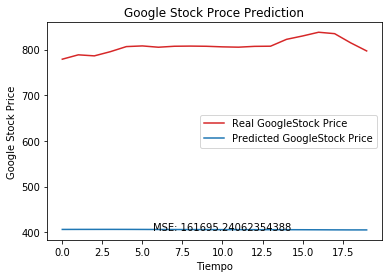

In [24]:
# Deshacemos la normalización del conjunto de test
test_set_desn = sc.inverse_transform(test_set.reshape(-1, 1))


# Visualizar resultados
plt.plot(test_set_desn, color='tab:red', label='Real GoogleStock Price')
plt.plot(prediccion_precio_desn, color='tab:blue', label='Predicted GoogleStock Price')
plt.title('Google Stock Proce Prediction')
plt.xlabel('Tiempo')
plt.ylabel('Google Stock Price')
plt.text(x=prediccion_precio_desn.size/2, y=prediccion_precio_desn.min()*1.001,
         s='MSE: {}'.format(((prediccion_precio_desn-test_set_desn)**2).mean()),
         horizontalalignment='center')
plt.legend()
plt.show()

Se observa que la predicción realizada por el modelo presenta una gran diferencia respecto de los datos reales.

Probamos a repetir la predicción con otra arquitectura en la que decrementamos progresivamente el número de unidades de las capas *LSTM* conforme aumenta la profundidad de las mismas:

In [26]:
def model_multilayer2():
    
    regresor = Sequential()

    # Agregando la primera capa LSTM y regularizando "Deserción"
    regresor.add(LSTM(units=50, return_sequences=True, input_shape=(None, 1)))
    regresor.add(Dropout(0.2))
             
    # Agregando segunda capa lSTM
    regresor.add(LSTM(units=36, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando tercera capa lSTM
    regresor.add(LSTM(units=20, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando cuarta capa lSTM
    regresor.add(LSTM(units=8))
    regresor.add(Dropout(0.2))
                  
    #Agregando capa de salida LSTM
    regresor.add(Dense(units=1))
    regresor.add(Dropout(0.2))
    
    return regresor

In [28]:
# Compilamos el modelo indicándole el optimizador y la función de error
model_multily2 = model_multilayer2()
model_multily2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenar el modelo
model_multily2.fit(X_train, y_train, batch_size = 32, epochs = 100)

# Evaluar el modelo
prediccion_precio2 = model_multily2.predict(test_data)
prediccion_precio_desn2 = sc.inverse_transform(prediccion_precio2)

print('Error cometido por el modelo model_multily2: ', ((prediccion_precio_desn2-test_set_desn)**2).mean())

Epoch 1/100
1257/1257 [==============================] - 1s 764us/step - loss: 0.2653
Epoch 2/100
1257/1257 [==============================] - 0s 127us/step - loss: 0.1409
Epoch 3/100
1257/1257 [==============================] - 0s 113us/step - loss: 0.0984
Epoch 4/100
1257/1257 [==============================] - 0s 201us/step - loss: 0.0860
Epoch 5/100
1257/1257 [==============================] - 0s 330us/step - loss: 0.0785
Epoch 6/100
1257/1257 [==============================] - 0s 318us/step - loss: 0.0768
Epoch 7/100
1257/1257 [==============================] - 0s 332us/step - loss: 0.0721
Epoch 8/100
1257/1257 [==============================] - 0s 328us/step - loss: 0.0745
Epoch 9/100
1257/1257 [==============================] - 0s 311us/step - loss: 0.0825
Epoch 10/100
1257/1257 [==============================] - 0s 322us/step - loss: 0.0732
Epoch 11/100
1257/1257 [==============================] - 0s 317us/step - loss: 0.0669
Epoch 12/100
1257/1257 [============================

1257/1257 [==============================] - 0s 313us/step - loss: 0.0620
Epoch 96/100
1257/1257 [==============================] - 0s 305us/step - loss: 0.0618
Epoch 97/100
1257/1257 [==============================] - 0s 306us/step - loss: 0.0718
Epoch 98/100
1257/1257 [==============================] - 0s 303us/step - loss: 0.0686
Epoch 99/100
1257/1257 [==============================] - 0s 302us/step - loss: 0.0710
Epoch 100/100
1257/1257 [==============================] - 0s 311us/step - loss: 0.0611
Error cometido por el modelo model_multily2:  11131.099601017238


Con esta modificación, se ha logrado reducir el error cometido por el modelo.

Probamos ahora, otro modelo con esta idea pero disminuyendo el número de unidades de cada capa *LSTM*:

In [29]:
def model_multilayer3():
    
    regresor = Sequential()

    # Agregando la primera capa LSTM y regularizando "Deserción"
    regresor.add(LSTM(units=32, return_sequences=True, input_shape=(None, 1)))
    regresor.add(Dropout(0.2))
             
    # Agregando segunda capa lSTM
    regresor.add(LSTM(units=24, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando tercera capa lSTM
    regresor.add(LSTM(units=12, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando cuarta capa lSTM
    regresor.add(LSTM(units=8))
    regresor.add(Dropout(0.2))
                  
    #Agregando capa de salida LSTM
    regresor.add(Dense(units=1))
    regresor.add(Dropout(0.2))
    
    return regresor

In [30]:
# Compilamos el modelo indicándole el optimizador y la función de error
model_multily3 = model_multilayer3()
model_multily3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenar el modelo
model_multily3.fit(X_train, y_train, batch_size = 32, epochs = 100)

# Evaluar el modelo
prediccion_precio3 = model_multily3.predict(test_data)
prediccion_precio_desn3 = sc.inverse_transform(prediccion_precio3)

print('Error cometido por el modelo model_multily3: ', ((prediccion_precio_desn3-test_set_desn)**2).mean())

Epoch 1/100
1257/1257 [==============================] - 1s 939us/step - loss: 0.2685
Epoch 2/100
1257/1257 [==============================] - 0s 109us/step - loss: 0.1709
Epoch 3/100
1257/1257 [==============================] - 0s 112us/step - loss: 0.1076
Epoch 4/100
1257/1257 [==============================] - 0s 131us/step - loss: 0.1005
Epoch 5/100
1257/1257 [==============================] - 0s 285us/step - loss: 0.0771
Epoch 6/100
1257/1257 [==============================] - 0s 328us/step - loss: 0.0731
Epoch 7/100
1257/1257 [==============================] - 0s 313us/step - loss: 0.0804
Epoch 8/100
1257/1257 [==============================] - 0s 329us/step - loss: 0.0773
Epoch 9/100
1257/1257 [==============================] - 0s 309us/step - loss: 0.0769
Epoch 10/100
1257/1257 [==============================] - 0s 308us/step - loss: 0.0723
Epoch 11/100
1257/1257 [==============================] - 0s 309us/step - loss: 0.0774
Epoch 12/100
1257/1257 [============================

Con esta arquitectura el error se ha logrado una gran reducción del error. 

Probamos ahora a eliminar una capa oculta de la arquitectura:

In [31]:
def model_multilayer4():
    
    regresor = Sequential()

    # Agregando la primera capa LSTM y regularizando "Deserción"
    regresor.add(LSTM(units=32, return_sequences=True, input_shape=(None, 1)))
    regresor.add(Dropout(0.2))
             
    # Agregando segunda capa lSTM
    regresor.add(LSTM(units=24, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando cuarta capa lSTM
    regresor.add(LSTM(units=8))
    regresor.add(Dropout(0.2))
                  
    #Agregando capa de salida LSTM
    regresor.add(Dense(units=1))
    regresor.add(Dropout(0.2))
    
    return regresor

In [32]:
# Compilamos el modelo indicándole el optimizador y la función de error
model_multily4 = model_multilayer4()
model_multily4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenar el modelo
model_multily4.fit(X_train, y_train, batch_size = 32, epochs = 100)

# Evaluar el modelo
prediccion_precio4 = model_multily4.predict(test_data)
prediccion_precio_desn4 = sc.inverse_transform(prediccion_precio4)

print('Error cometido por el modelo model_multily4: ', ((prediccion_precio_desn4-test_set_desn)**2).mean())

Epoch 1/100
1257/1257 [==============================] - 1s 634us/step - loss: 0.2577
Epoch 2/100
1257/1257 [==============================] - 0s 85us/step - loss: 0.1390
Epoch 3/100
1257/1257 [==============================] - 0s 94us/step - loss: 0.0926
Epoch 4/100
1257/1257 [==============================] - 0s 97us/step - loss: 0.0832
Epoch 5/100
1257/1257 [==============================] - 0s 167us/step - loss: 0.0754
Epoch 6/100
1257/1257 [==============================] - 0s 265us/step - loss: 0.0745
Epoch 7/100
1257/1257 [==============================] - 0s 276us/step - loss: 0.0721
Epoch 8/100
1257/1257 [==============================] - 0s 258us/step - loss: 0.0717
Epoch 9/100
1257/1257 [==============================] - 0s 256us/step - loss: 0.0704
Epoch 10/100
1257/1257 [==============================] - 0s 256us/step - loss: 0.0729
Epoch 11/100
1257/1257 [==============================] - 0s 263us/step - loss: 0.0774
Epoch 12/100
1257/1257 [==============================]

Con esta eliminación de capa oculta, el rendimiento del modelo ha emporado. Probamos otra arquitectura con el número de capas inicial, pero reduciendo aún más el número de unidades en las capas *LSTM*:

In [33]:
def model_multilayer5():
    
    regresor = Sequential()

    # Agregando la primera capa LSTM y regularizando "Deserción"
    regresor.add(LSTM(units=24, return_sequences=True, input_shape=(None, 1)))
    regresor.add(Dropout(0.2))
             
    # Agregando segunda capa lSTM
    regresor.add(LSTM(units=16, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando tercera capa lSTM
    regresor.add(LSTM(units=8, return_sequences=True))
    regresor.add(Dropout(0.1))

    # Agregando cuarta capa lSTM
    regresor.add(LSTM(units=4))
    regresor.add(Dropout(0.1))
                  
    #Agregando capa de salida LSTM
    regresor.add(Dense(units=1))
    regresor.add(Dropout(0.2))
    
    return regresor

In [34]:
# Compilamos el modelo indicándole el optimizador y la función de error
model_multily5 = model_multilayer5()
model_multily5.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenar el modelo
model_multily5.fit(X_train, y_train, batch_size = 32, epochs = 100)

# Evaluar el modelo
prediccion_precio5 = model_multily5.predict(test_data)
prediccion_precio_desn5 = sc.inverse_transform(prediccion_precio5)

print('Error cometido por el modelo model_multily5: ', ((prediccion_precio_desn5-test_set_desn)**2).mean())

Epoch 1/100
1257/1257 [==============================] - 1s 906us/step - loss: 0.2775
Epoch 2/100
1257/1257 [==============================] - 0s 124us/step - loss: 0.2024
Epoch 3/100
1257/1257 [==============================] - 0s 104us/step - loss: 0.1222
Epoch 4/100
1257/1257 [==============================] - 0s 277us/step - loss: 0.1014
Epoch 5/100
1257/1257 [==============================] - 0s 328us/step - loss: 0.0894
Epoch 6/100
1257/1257 [==============================] - 0s 312us/step - loss: 0.0874
Epoch 7/100
1257/1257 [==============================] - 0s 319us/step - loss: 0.0800
Epoch 8/100
1257/1257 [==============================] - 0s 316us/step - loss: 0.0759
Epoch 9/100
1257/1257 [==============================] - 0s 305us/step - loss: 0.0720
Epoch 10/100
1257/1257 [==============================] - 0s 308us/step - loss: 0.0746
Epoch 11/100
1257/1257 [==============================] - 0s 262us/step - loss: 0.0657
Epoch 12/100
1257/1257 [============================

Con esta configuración, el error aumenta notoriamente.

Probamos otra configuración, partiendo de la arquitectura de *model_multilayer3*, pero se agrega otra capa más:

In [35]:
def model_multilayer6():
    
    regresor = Sequential()

    # Agregando la primera capa LSTM y regularizando "Deserción"
    regresor.add(LSTM(units=32, return_sequences=True, input_shape=(None, 1)))
    regresor.add(Dropout(0.2))
             
    # Agregando segunda capa lSTM
    regresor.add(LSTM(units=24, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando tercera capa lSTM
    regresor.add(LSTM(units=16, return_sequences=True))
    regresor.add(Dropout(0.2))
    
    # Agregando cuarta capa lSTM
    regresor.add(LSTM(units=12, return_sequences=True))
    regresor.add(Dropout(0.2))

    # Agregando quinta capa lSTM
    regresor.add(LSTM(units=8))
    regresor.add(Dropout(0.2))
                  
    #Agregando capa de salida LSTM
    regresor.add(Dense(units=1))
    regresor.add(Dropout(0.2))
    
    return regresor

In [36]:
# Compilamos el modelo indicándole el optimizador y la función de error
model_multily6 = model_multilayer6()
model_multily6.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenar el modelo
model_multily6.fit(X_train, y_train, batch_size = 32, epochs = 100)

# Evaluar el modelo
prediccion_precio6 = model_multily6.predict(test_data)
prediccion_precio_desn6 = sc.inverse_transform(prediccion_precio6)

print('Error cometido por el modelo model_multily6: ', ((prediccion_precio_desn6-test_set_desn)**2).mean())

Epoch 1/100
1257/1257 [==============================] - 1s 1ms/step - loss: 0.2639
Epoch 2/100
1257/1257 [==============================] - 0s 159us/step - loss: 0.1641
Epoch 3/100
1257/1257 [==============================] - 0s 259us/step - loss: 0.1135
Epoch 4/100
1257/1257 [==============================] - 0s 393us/step - loss: 0.0987
Epoch 5/100
1257/1257 [==============================] - 0s 373us/step - loss: 0.0919
Epoch 6/100
1257/1257 [==============================] - 1s 400us/step - loss: 0.0800
Epoch 7/100
1257/1257 [==============================] - 0s 394us/step - loss: 0.0826
Epoch 8/100
1257/1257 [==============================] - 0s 391us/step - loss: 0.0737
Epoch 9/100
1257/1257 [==============================] - 1s 399us/step - loss: 0.0704
Epoch 10/100
1257/1257 [==============================] - 0s 387us/step - loss: 0.0748
Epoch 11/100
1257/1257 [==============================] - 0s 388us/step - loss: 0.0714
Epoch 12/100
1257/1257 [==============================

Este incremento en el número de capas ha resultado en un gran aumento del error cometido por el modelo.

Probamos otro experiemento basándonos en la arquitectura *model_1layer_54units* que dió los mejores resultados en el ejercicio anterior

In [41]:
# Compilamos el modelo indicándole el optimizador y la función de error
model_multily7 = create_model_1layer_54units()
model_multily7.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenar el modelo
model_multily7.fit(X_train, y_train, batch_size = 32, epochs = 100)

# Evaluar el modelo
prediccion_precio7 = model_multily7.predict(test_data)
prediccion_precio_desn7 = sc.inverse_transform(prediccion_precio7)

print('Error cometido por el modelo model_1layer_54units: ', ((prediccion_precio_desn7-test_set_desn)**2).mean())

Epoch 1/100
1257/1257 [==============================] - 0s 219us/step - loss: 0.5782
Epoch 2/100
1257/1257 [==============================] - 0s 49us/step - loss: 0.1057
Epoch 3/100
1257/1257 [==============================] - 0s 45us/step - loss: 0.0633
Epoch 4/100
1257/1257 [==============================] - 0s 44us/step - loss: 0.0606
Epoch 5/100
1257/1257 [==============================] - 0s 43us/step - loss: 0.0578
Epoch 6/100
1257/1257 [==============================] - 0s 45us/step - loss: 0.0548
Epoch 7/100
1257/1257 [==============================] - 0s 60us/step - loss: 0.0517
Epoch 8/100
1257/1257 [==============================] - 0s 69us/step - loss: 0.0486
Epoch 9/100
1257/1257 [==============================] - 0s 57us/step - loss: 0.0454
Epoch 10/100
1257/1257 [==============================] - 0s 57us/step - loss: 0.0421
Epoch 11/100
1257/1257 [==============================] - 0s 59us/step - loss: 0.0389
Epoch 12/100
1257/1257 [==============================] - 0s 5

El rendimiento obtenido por este modelo es incluso inferior que el primer modelo tratado en esta sección.

Probamos un último experimento basándonos en la arquitectura *model_multilayer3*, pero ejecutamos el entrenamiento considerando un tamaño de lote (*batch*) de 50 patrones:

In [42]:
# Compilamos el modelo indicándole el optimizador y la función de error
model_multily8 = model_multilayer3()
model_multily8.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenar el modelo
model_multily8.fit(X_train, y_train, batch_size = 50, epochs = 100)

# Evaluar el modelo
prediccion_precio8 = model_multily8.predict(test_data)
prediccion_precio_desn8 = sc.inverse_transform(prediccion_precio8)

print('Error cometido por el modelo model_multily8: ', ((prediccion_precio_desn8-test_set_desn)**2).mean())

Epoch 1/100
1257/1257 [==============================] - 1s 906us/step - loss: 0.2835
Epoch 2/100
1257/1257 [==============================] - 0s 78us/step - loss: 0.2345
Epoch 3/100
1257/1257 [==============================] - 0s 76us/step - loss: 0.1692
Epoch 4/100
1257/1257 [==============================] - 0s 75us/step - loss: 0.1125
Epoch 5/100
1257/1257 [==============================] - 0s 159us/step - loss: 0.0994
Epoch 6/100
1257/1257 [==============================] - 0s 220us/step - loss: 0.0890
Epoch 7/100
1257/1257 [==============================] - 0s 220us/step - loss: 0.0750
Epoch 8/100
1257/1257 [==============================] - 0s 233us/step - loss: 0.0832
Epoch 9/100
1257/1257 [==============================] - 0s 224us/step - loss: 0.0876
Epoch 10/100
1257/1257 [==============================] - 0s 240us/step - loss: 0.0730
Epoch 11/100
1257/1257 [==============================] - 0s 226us/step - loss: 0.0728
Epoch 12/100
1257/1257 [==============================]

Recogemos en la siguiente tabla los errores *MSE* cometidos por cada modelo:

| modelo                   |          MSE test     |
| :----------------------: | :-------------------: |
| model_multilayer         | 161695.2406 |
| model_multilayer2        | 11131.099601017238 |
| model_multilayer3        | 293.29485950706334 |
| model_multilayer4        | 346.38657548055227 |
| model_multilayer5        | 3392.6553490196266 |
| model_multilayer6        | 23689.00416852946  |
| model_1layer_54units        |  89315.77078493396  |
| model_multilayer3 (btach=50)        | **263.30500038374373**  |

Observamos que el modelo que ofreció mejores resultados es el modelo basado en la arquitectura *model_multilayer3* con un *batch* de 50.

Los experimentos realizados, permiten comprobar que para este problema existen ciertas configuraciones específicas de arquitectura que ofrecen mejores rendimientos y, en principio, es difícil encontrar tendencias en el aumento o decremento del número de unidades, capas, etc que impliquen mejoras en el rendimiento de los modelos.

En este caso, la arquitectura *model_multilayer3* ha permitido desarrollar los mejores modelos. El incremento o decremento del número de unidades o capas a partir de esta arquitectura, ha resultado en un empeoramiento en los resultados obtenidos. Por su parte, incrementar el tamaño del lote (*batch*), ha permitido una pequeña mejora en el rendimiento del modelo.

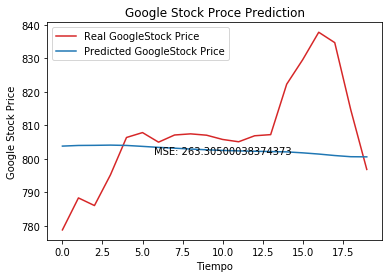

In [43]:
# Visualizar resultados
plt.plot(test_set_desn, color='tab:red', label='Real GoogleStock Price')
plt.plot(prediccion_precio_desn8, color='tab:blue', label='Predicted GoogleStock Price')
plt.title('Google Stock Proce Prediction')
plt.xlabel('Tiempo')
plt.ylabel('Google Stock Price')
plt.text(x=prediccion_precio_desn8.size/2, y=prediccion_precio_desn8.min()*1.001,
         s='MSE: {}'.format(((prediccion_precio_desn8-test_set_desn)**2).mean()),
         horizontalalignment='center')
plt.legend()
plt.show()

Apreciamos en la anterior gráfica uno de los mayores inconvenientes que están reflejando estos modelos: No logran ajustar correctamente la forma de la variable real y tienden a ajustar a sus valores medios. 